<div style="float: right;">
  <a href="../../de/{{path-to-page}}" style="margin-left: 10px;">🇩🇪 Deutsch</a>
  <a href="../../en/{{path-to-page}}">🇬🇧 English</a>
</div>

# 4. pandas und matplotlib

Erinnerst du dich an die Bibliothek, die wir im letzten Kapitel installiert haben? Diese Bibliothek heißt **pandas** und ist vermutlich die am häufigsten verwendete Bibliothek in Python. Sie erlaubt es uns, beliebige Daten in eine Tabelle zu verwandeln, die wir anschließend analysieren und visualisieren können.

Schauen wir sie uns in Aktion an:

In [1]:
import pandas as pd
names = ["Alice", "Bob", "Charlie"]
ages = [25, 30, 35]
hobby = ["Python-Tutorials abschließen", "Sport", "Python-Tutorials abschließen"]
data = {"Name": names, "Alter": ages, "Hobby": hobby}
df = pd.DataFrame(data)
print(df)

      Name  Alter                         Hobby
0    Alice     25  Python-Tutorials abschließen
1      Bob     30                         Sport
2  Charlie     35  Python-Tutorials abschließen


Wie du siehst, erlaubt es uns pandas, unsere Daten sauber in Tabellenform zu organisieren.

Wir können jetzt die `groupby`-Funktion von pandas verwenden, um unsere Daten nach einer bestimmten Spalte zu gruppieren und dann eine Funktion auf jede Gruppe anzuwenden. In diesem Fall gruppieren wir nach der Spalte "Hobby" und zählen, wie viele Personen dasselbe Hobby haben:

In [2]:
df_grouped = df.groupby("Hobby").size()
print(df_grouped)

Hobby
Python-Tutorials abschließen    2
Sport                           1
dtype: int64


Nehmen wir nun an, wir haben eine CSV-Datei namens "prices.csv", die wir normalerweise mit Microsoft Excel öffnen würden und die Daten enthält, die wir analysieren möchten. pandas erlaubt es uns, Excel- bzw. CSV-Dateien mit nur einer Zeile in ein DataFrame einzulesen:

In [3]:
price_data = pd.read_csv("prices.csv")
print(price_data)

      timestamp  difference
0    2022-01-01     -842.52
1    2022-01-02     1490.70
2    2022-01-03     -495.08
3    2022-01-04     -734.92
4    2022-01-05     -610.64
..          ...         ...
360  2022-12-27      112.44
361  2022-12-28     -242.95
362  2022-12-29     -154.67
363  2022-12-30       86.83
364  2022-12-31      -21.54

[365 rows x 2 columns]


Diese Datei enthält Zeitstempel und die Kursveränderungen einer Aktie zwischen den jeweiligen Zeitpunkten. Wenn wir nur die Daten für einen bestimmten Zeitraum sehen wollen, können wir das DataFrame mit der Funktion `loc` filtern. In diesem Fall wollen wir die Daten vom 01.02.2022 bis zum 01.09.2023 anzeigen:

In [4]:
start_date = "2022-02-01"
end_date = "2023-09-01"
filtered_data = price_data.loc[(price_data["timestamp"] >= start_date) & (price_data["timestamp"] <= end_date)]
print(filtered_data)

      timestamp  difference
31   2022-02-01      503.88
32   2022-02-02      317.67
33   2022-02-03    -1836.18
34   2022-02-04      337.87
35   2022-02-05     4293.08
..          ...         ...
360  2022-12-27      112.44
361  2022-12-28     -242.95
362  2022-12-29     -154.67
363  2022-12-30       86.83
364  2022-12-31      -21.54

[334 rows x 2 columns]


Um diese zeitabhängigen Daten zu visualisieren, können wir zunächst die Spalte mit den Zeitstempeln in ein Datumsformat umwandeln und dann ein Diagramm erstellen:

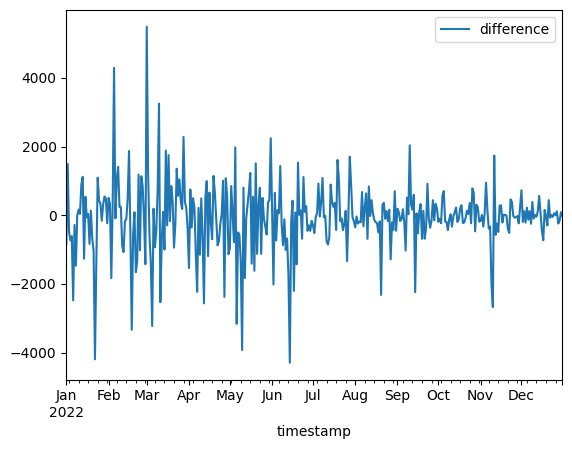

In [5]:
import matplotlib.pyplot as plt
price_data["timestamp"] = pd.to_datetime(price_data["timestamp"])
price_data.plot(x="timestamp", y="difference")
plt.show()